**BIENVENIDO(A)**

En este repositorio encontrarás diversos cuadernos de Jupyter donde desarrollo análisis prácticos aplicados a múltiples conjuntos de datos. He estructurado estos proyectos enfocándome no solo en el resultado final, sino en documentar exhaustivamente el proceso analítico.

Para facilitar la comprensión de mi razonamiento lógico en cada fase de exploración, he incluido comentarios detallados en el código. Esta práctica me permite mantener un registro claro de mis ideas y, simultáneamente, busca hacer el contenido completamente accesible para otros analistas, estudiantes o reclutadores que examinen mi trabajo.

Como Analista de Datos Junior en constante formación, reconozco el inmenso valor del trabajo colaborativo y la revisión por pares. Si al revisar mi código identificas áreas de mejora, mejores prácticas o tienes críticas constructivas, te invito cordialmente a compartirlas. Toda observación que contribuya a mi crecimiento profesional es sinceramente apreciada.

Dataframe Analizado: https://www.kaggle.com/datasets/shivamb/netflix-shows

**INSTALACIÓN DE PAQUETES REQUERIDOS**

In [417]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


**IMPORTACIÓN DE LIBRERÍAS**

In [419]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

**RUTA DEL ARCHIVO CSV**

In [421]:
# RUTA LOCAL

# local_file_path = ''

# RUTA ONLINE

online_file_path = kagglehub.dataset_download("shivamb/netflix-shows")

**CARGA DEL DATAFRAME**

In [423]:
# df = pd.read_csv(local_file_path)
df = pd.read_csv(f"{online_file_path}/netflix_titles.csv")

**CONFIGURACIÓN DE VISUALIZACIÓN**

In [425]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

**EXPLORACIÓN INICIAL DEL DATAFRAME**

In [427]:
print('\ndf.columns: Columnas Del DataFrame.\n')
print(list(df.columns),'\n')

print('df.head(): Primeras 5 Filas Del DataFrame.\n') 
print(df.head(),'\n')                                         

print('df.tail(): Últimas 5 Filas Del DataFrame.\n')
print(df.tail(),'\n')                                        

print('df.sample(5): 5 Filas Aleatorias Del DataFrame.\n')
print(df.sample(5),'\n')                                                                                       

print('df.shape: Dimensión Del DataFrame (Filas, Columnas).\n')
print(df.shape,'\n')

print('df.info(): Información General Del DataFrame.\n')
df.info()


df.columns: Columnas Del DataFrame.

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'] 

df.head(): Primeras 5 Filas Del DataFrame.

  show_id     type                  title         director                                               cast        country          date_added  release_year rating   duration                                          listed_in                                        description
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson                                                NaN  United States  September 25, 2021          2020  PG-13     90 min                                      Documentaries  As her father nears the end of his life, filmm...
1      s2  TV Show          Blood & Water              NaN  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa  September 24, 2021          2021  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV 

**LIMPIEZA DE DATOS - DETECCIÓN DE VALORES FALTANTES**

In [429]:
# VALORES FALTANTES POR COLUMNA

print('\nValores Faltantes Por Columna:\n')

missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

# PORCENTAJE DE VALORES FALTANTES POR COLUMNA

print('\nPorcentaje De Valores Faltantes Por Columna:\n')

missing_percentage = (df.isnull().sum() / len(df)) * 100    

print(missing_percentage[missing_percentage > 0].sort_values(ascending=False),'\n')

# Sustituir de valores NaN con "Sin Información" en las columnas 'director', 'cast', 'country', 'date_added', 'rating' y 'duration'.

for col in ['director', 'cast', 'country', 'date_added', 'rating', 'duration']:
    df[col] = df[col].fillna("Sin Información")


Valores Faltantes Por Columna:

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

Porcentaje De Valores Faltantes Por Columna:

director      29.908028
country        9.435676
cast           9.367549
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64 



**LIMPIEZA DE DATOS - GESTIÓN DE VALORES DUPLICADOS**

In [431]:
# NÚMERO DE FILAS DUPLICADAS

num_duplicates = df.duplicated().sum()

print('\nNúmero De Filas Duplicadas\n')                                                                                                                
print(f"Filas Duplicadas Encontradas: {num_duplicates}\n")


Número De Filas Duplicadas

Filas Duplicadas Encontradas: 0



**LIMPIEZA DE DATOS - CORRECCIÓN DE TIPOS DE DATOS**

In [433]:
# TIPOS DE DATOS ORIGINALES

print('\nTipos De Datos Originales:\n')
print(df.dtypes,'\n')

# CORRECCIÓN DE TIPO DE DATO DE COLUMNA 'date_added'

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# TIPOS DE DATOS CORREGIDOS

print("Tipos De Datos Corregidos:\n")
print(df.dtypes,'\n')


Tipos De Datos Originales:

show_id           str
type              str
title             str
director          str
cast              str
country           str
date_added        str
release_year    int64
rating            str
duration          str
listed_in         str
description       str
dtype: object 

Tipos De Datos Corregidos:

show_id                    str
type                       str
title                      str
director                   str
cast                       str
country                    str
date_added      datetime64[us]
release_year             int64
rating                     str
duration                   str
listed_in                  str
description                str
dtype: object 



**LIMPIEZA DE DATOS - CREACIÓN DE NUEVAS COLUMNAS**

In [435]:
print('\nCreación De Nuevas Columnas (Minutos Y Temporadas):\n')

df['minutes'] = df['duration'].str.extract(r'(\d+) min').astype('Int64')
df['seasons'] = df['duration'].str.extract(r'(\d+) [Ss]eason').astype('Int64')

print(df[['duration', 'minutes', 'seasons']].head(),'\n')


Creación De Nuevas Columnas (Minutos Y Temporadas):

    duration  minutes  seasons
0     90 min       90     <NA>
1  2 Seasons     <NA>        2
2   1 Season     <NA>        1
3   1 Season     <NA>        1
4  2 Seasons     <NA>        2 



**LIMPIEZA DE DATOS - CORRECCIÓN DE VALORES EN COLUMNA RATING**

In [437]:
print("\nFilas Sucias:\n")
filas_sucias = df[df['rating'].str.contains('min', na=False)]
print(filas_sucias[['rating', 'duration']])

df.loc[df['rating'].str.contains('min', na=False), 'duration'] = df['rating']
df.loc[df['rating'].str.contains('min', na=False), 'rating'] = 'Sin Información'

print('\nFilas Sucias Corregidas:\n')
print(df.loc[filas_sucias.index, ['rating', 'duration']], '\n')


Filas Sucias:

      rating         duration
5541  74 min  Sin Información
5794  84 min  Sin Información
5813  66 min  Sin Información

Filas Sucias Corregidas:

               rating duration
5541  Sin Información   74 min
5794  Sin Información   84 min
5813  Sin Información   66 min 



**ANÁLISIS EXPLORATORIO DE DATOS (EDA)**


Pregunta 1: ¿Cuántas películas (Movie) y cuántas series (TV Show) hay en el dataset? Muestra los porcentajes.

Conteo:

 type
Movie      6131
TV Show    2676
Name: count, dtype: int64 

Porcentajes:

 type
Movie      69.615079
TV Show    30.384921
Name: count, dtype: float64 





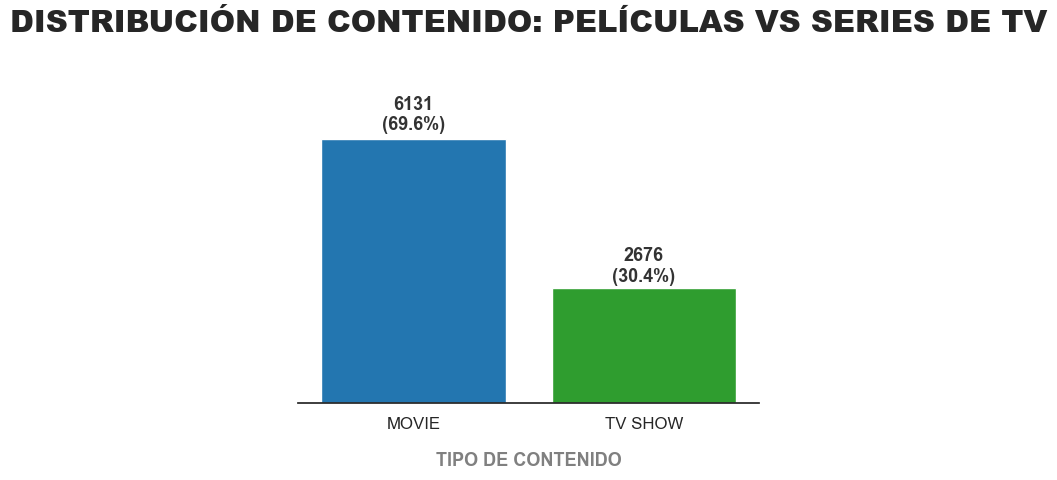

In [439]:
# PREGUNTA 1: ¿Cuántas películas y cuántos tv shows hay en el dataset? Muestra los porcentajes.

print('\nPregunta 1: ¿Cuántas películas (Movie) y cuántas series (TV Show) hay en el dataset? Muestra los porcentajes.\n')

# FILTRADO

conteo_peliculas_series = df['type'].value_counts()
porcentajes = conteo_peliculas_series / conteo_peliculas_series.sum() * 100
print("Conteo:\n\n",conteo_peliculas_series,'\n')
print("Porcentajes:\n\n",porcentajes,'\n')

# GRÁFICO

colors = ['#1f77b4', '#2ca02c']
sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(5, 5))

ax = sns.barplot(
    x=conteo_peliculas_series.index.str.upper(),
    y=conteo_peliculas_series.values,
    hue=conteo_peliculas_series.index,
    palette=colors,
    saturation=0.95,
    legend=False
)

for i, valor in enumerate(conteo_peliculas_series.values):
    porcentaje_actual = porcentajes.iloc[i]
    
    texto_etiqueta = f"{valor}\n({porcentaje_actual:.1f}%)"
    
    ax.text(
        i,
        valor + (valor * 0.02),
        texto_etiqueta,
        ha='center',
        va='bottom',
        fontsize=13,
        fontweight='bold',
        color='#333333'
    )

sns.despine(
    left=True, 
    bottom=False
)

plt.title(
    "DISTRIBUCIÓN DE CONTENIDO: PELÍCULAS VS SERIES DE TV",
    fontsize=22,
    fontweight='heavy',
    loc='center',
    pad=30
)

plt.xlabel(
    "TIPO DE CONTENIDO", 
    fontsize=13, 
    labelpad=15, 
    fontweight='bold', 
    color='gray'
)

plt.ylabel("")
plt.yticks([])

plt.ylim(
    0, 
    conteo_peliculas_series.values.max() * 1.25
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')


Pregunta 2: Top Países: ¿Cuáles son los 5 países que más contenido producen en Netflix?

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Name: count, dtype: int64 





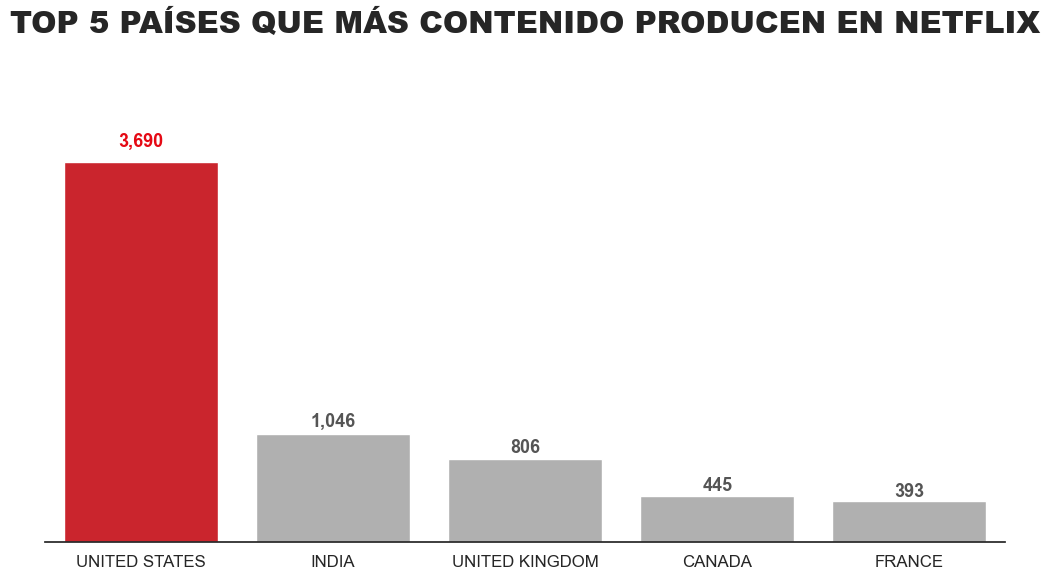

In [440]:
# PREGUNTA 2: Top Países: ¿Cuáles son los 5 países que más contenido producen en Netflix?.

print('\nPregunta 2: Top Países: ¿Cuáles son los 5 países que más contenido producen en Netflix?\n')

# FILTRADO

top_countries = df['country'].str.split(',').explode().str.strip().value_counts().drop('Sin Información', errors='ignore').head(5)
print(top_countries,'\n')

# GRÁFICO

sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(10, 6))

colores_top = ['#E50914'] + ['#B0B0B0'] * (len(top_countries) - 1)

ax = sns.barplot(
    x=top_countries.index.str.upper(),
    y=top_countries.values,
    hue=top_countries.index,
    palette=colores_top,
    legend=False
)

for i, valor in enumerate(top_countries.values):
    color_texto = '#E50914' if i == 0 else '#555555'
    
    ax.text(
        i, 
        valor + (valor * 0.03), 
        f"{valor:,}",         
        ha='center', 
        va='bottom', 
        fontsize=13,            
        fontweight='bold',
        color=color_texto
    )

sns.despine(
    left=True,
    bottom=False
)

plt.title(
    "TOP 5 PAÍSES QUE MÁS CONTENIDO PRODUCEN EN NETFLIX",
    fontsize=22,
    fontweight='heavy',
    loc='center',
    pad=25
)

plt.xlabel("")
plt.ylabel("") 
plt.yticks([])

plt.ylim(
    0, 
    top_countries.values.max() * 1.25
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')


Pregunta 3: Clasificación por edades: ¿Cuál es la clasificación (rating) más común en todo el catálogo?

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64 





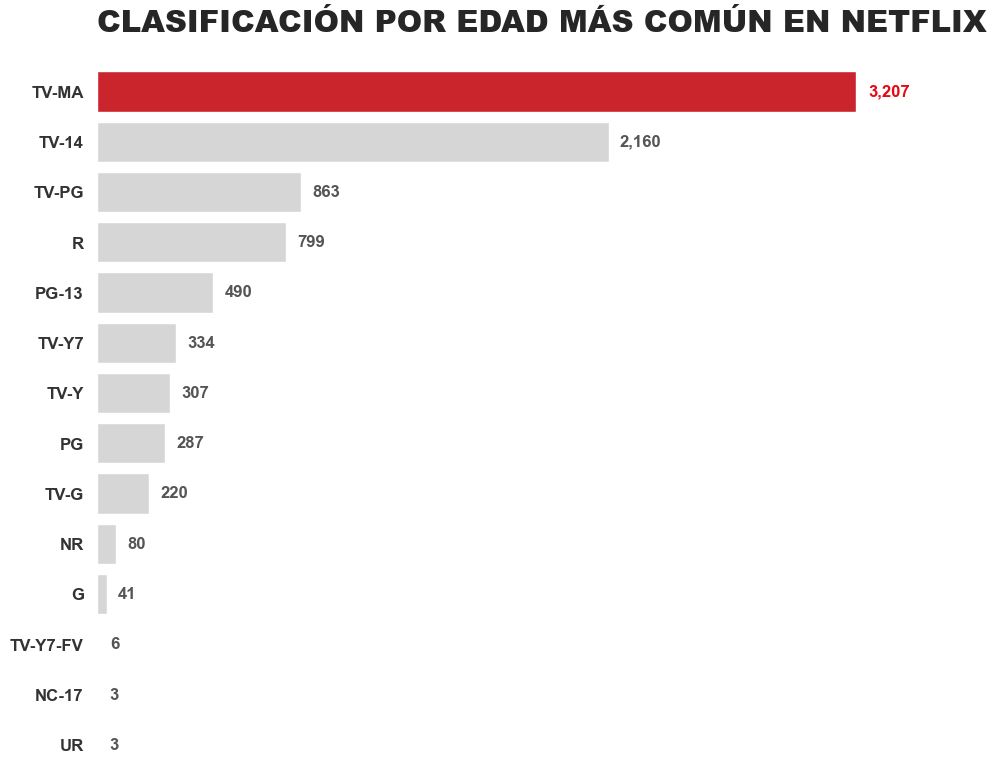

In [441]:
# PREGUNTA 3: Clasificación por edades: ¿Cuál es la clasificación (rating) más común en todo el catálogo?

print('\nPregunta 3: Clasificación por edades: ¿Cuál es la clasificación (rating) más común en todo el catálogo?\n')

# FILTRADO

df = df[df['rating'] != 'Sin Información']
conteo_rating = df['rating'].value_counts()
print(conteo_rating,'\n')

# GRÁFICO

sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(10, 8)) 

colores_rating = ['#E50914'] + ['#D6D6D6'] * (len(conteo_rating) - 1)

ax = sns.barplot(
    y=conteo_rating.index, 
    x=conteo_rating.values,
    hue=conteo_rating.index,
    palette=colores_rating,
    legend=False
)

for i, valor in enumerate(conteo_rating.values):
    color_texto = '#E50914' if i == 0 else '#555555'
    
    ax.text(
        valor + (conteo_rating.values.max() * 0.015), 
        i, 
        f"{valor:,}", 
        ha='left',    
        va='center',  
        fontsize=12,            
        fontweight='bold',
        color=color_texto
    )

sns.despine(
    left=True, 
    bottom=True
)

plt.title(
    "CLASIFICACIÓN POR EDAD MÁS COMÚN EN NETFLIX",
    fontsize=22,
    fontweight='heavy',
    loc='left',
    pad=25
)

plt.xlabel("") 
plt.ylabel("") 
plt.xticks([])

plt.xlim(
    0, 
    conteo_rating.values.max() * 1.15
)

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_color('#333333')

plt.tight_layout()
print('\n')
plt.show()
print('\n')


Pregunta 4: Directores prolíficos: ¿Quién es el director con más títulos en la plataforma? ¿Cuáles son los 10 directores con más títulos en la plataforma?

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64 





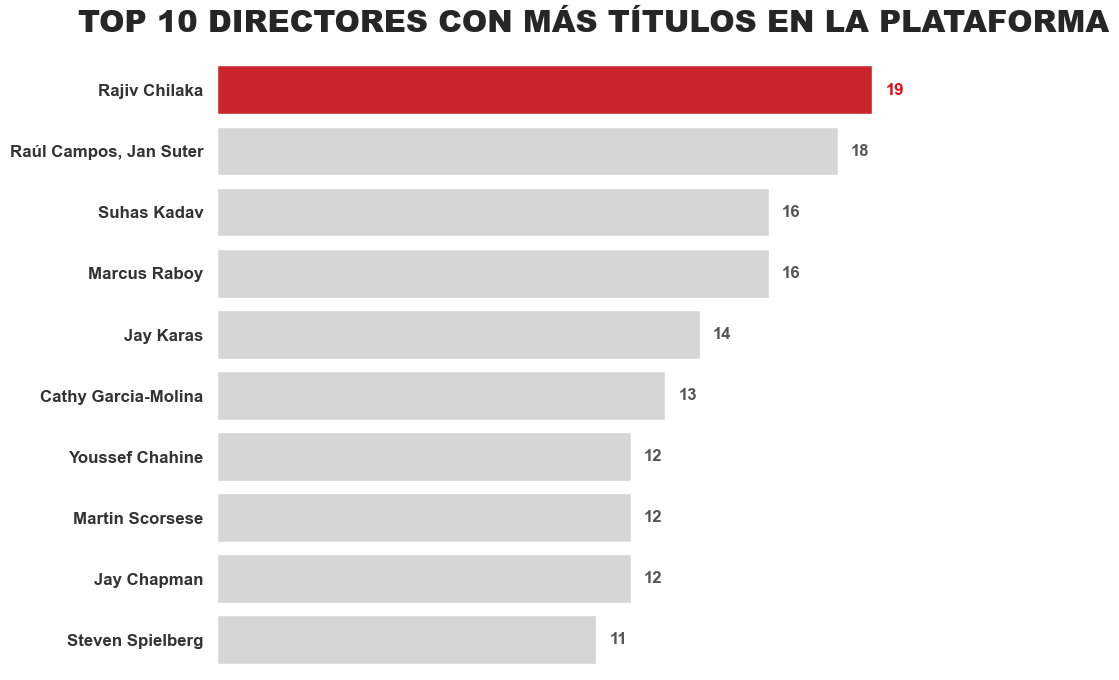

In [442]:
# PREGUNTA 4: Directores prolíficos: ¿Quién es el director con más títulos en la plataforma? ¿Cuáles son los 10 directores con más títulos en la plataforma?

print('\nPregunta 4: Directores prolíficos: ¿Quién es el director con más títulos en la plataforma? ¿Cuáles son los 10 directores con más títulos en la plataforma?\n')

# FILTRADO

df = df[df['director'] != 'Sin Información']
conteo_directores = df['director'].value_counts()
print(conteo_directores.head(10),'\n')

top_directores = conteo_directores.head(10)

# GRÁFICO

sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(10, 7))

colores_directores = ['#E50914'] + ['#D6D6D6'] * (len(top_directores) - 1)

ax = sns.barplot(
    y=top_directores.index, 
    x=top_directores.values,
    palette=colores_directores,
    hue=top_directores.index,
    legend=False
)

for i, valor in enumerate(top_directores.values):
    color_texto = '#E50914' if i == 0 else '#555555'
    
    margen = top_directores.values.max() * 0.02
    
    ax.text(
        valor + margen, 
        i, 
        str(valor), 
        ha='left', 
        va='center', 
        fontsize=12,            
        fontweight='bold',
        color=color_texto
    )

sns.despine(left=True, bottom=True)

plt.title(
    "TOP 10 DIRECTORES CON MÁS TÍTULOS EN LA PLATAFORMA",
    fontsize=22,
    fontweight='heavy',
    loc='center',
    pad=20
)

plt.xlabel("") 
plt.ylabel("") 
plt.xticks([]) 

plt.xlim(
    0, 
    top_directores.values.max() * 1.15
)

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_color('#333333')

plt.tight_layout()
print('\n')
plt.show()
print('\n')


Pregunta 5: Desglose de géneros: La columna listed_in contiene géneros separados por comas. ¿Cuántos títulos hay por cada género individual?

listed_in
International Movies        2705
Dramas                      2401
Comedies                    1642
Action & Adventure           851
Documentaries                812
Independent Movies           751
Children & Family Movies     605
Romantic Movies              605
Thrillers                    575
Music & Musicals             358
Name: count, dtype: int64 





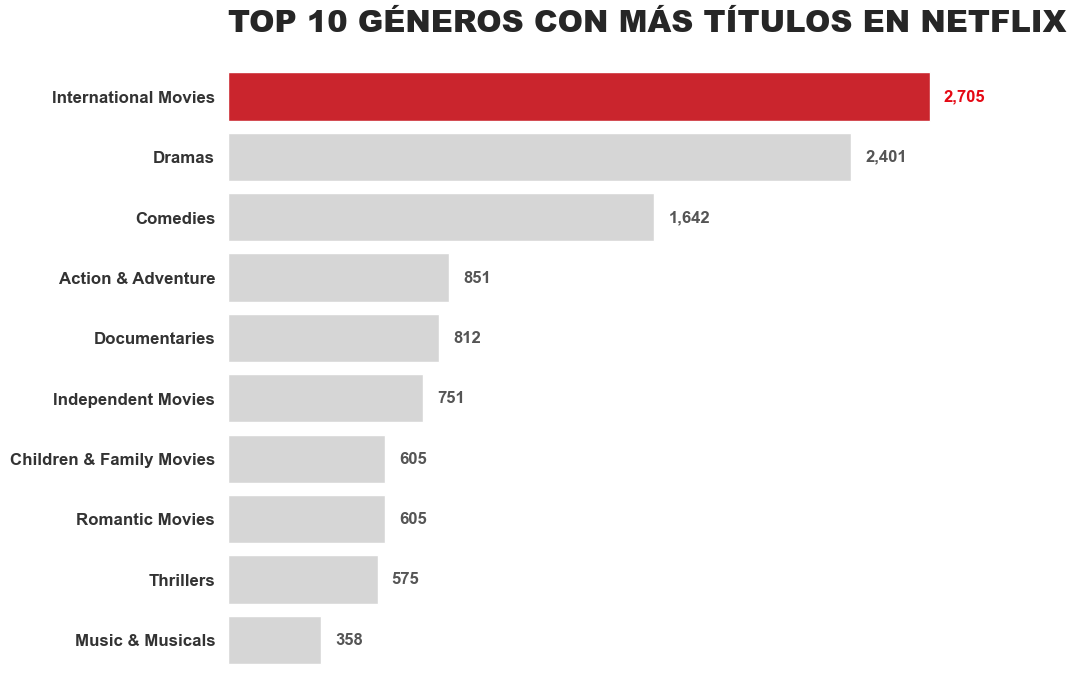

In [443]:
# PREGUNTA 5: Desglose de géneros: La columna listed_in contiene géneros separados por comas. ¿Cuántos títulos hay por cada género individual?

print('\nPregunta 5: Desglose de géneros: La columna listed_in contiene géneros separados por comas. ¿Cuántos títulos hay por cada género individual?\n')

# FILTRADO

conteo_generos = df['listed_in'].str.split(',').explode().str.strip().value_counts().drop('Sin Información', errors='ignore').head(10)
print(conteo_generos,'\n')

# GRÁFICO

sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(11, 7)) 

colores_generos = ['#E50914'] + ['#D6D6D6'] * (len(conteo_generos) - 1)

ax = sns.barplot(
    y=conteo_generos.index, 
    x=conteo_generos.values,
    palette=colores_generos,
    hue=conteo_generos.index,
    legend=False
)

for i, valor in enumerate(conteo_generos.values):
    color_texto = '#E50914' if i == 0 else '#555555'
    
    ax.annotate(
        f"{valor:,}",           
        xy=(valor, i),          
        xytext=(10, 0),         
        textcoords="offset points", 
        ha='left', 
        va='center', 
        fontsize=12,            
        fontweight='bold',
        color=color_texto
    )

sns.despine(
    left=True, 
    bottom=True
)

plt.title(
    "TOP 10 GÉNEROS CON MÁS TÍTULOS EN NETFLIX",
    fontsize=22,
    fontweight='heavy',
    loc='left',
    pad=25
)

plt.xlabel("") 
plt.ylabel("") 
plt.xticks([]) 

plt.xlim(
    0, 
    conteo_generos.values.max() * 1.20
)

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_color('#333333')

plt.tight_layout()
print('\n')
plt.show()
print('\n')


Pregunta 6: ¿Quién es el actor o actriz que aparece en más filmerias/series de Netflix? ¿Cuáles son los 20 actores/actrices con más títulos en la plataforma?

cast
Anupam Kher            42
Shah Rukh Khan         35
Naseeruddin Shah       32
Akshay Kumar           30
Om Puri                30
Amitabh Bachchan       28
Julie Tejwani          28
Paresh Rawal           28
Rupa Bhimani           27
Boman Irani            27
Kareena Kapoor         25
Samuel L. Jackson      23
Ajay Devgn             21
Rajesh Kava            21
Kay Kay Menon          21
Nawazuddin Siddiqui    21
Adam Sandler           20
Nicolas Cage           20
Salman Khan            20
James Franco           19
Name: count, dtype: int64 





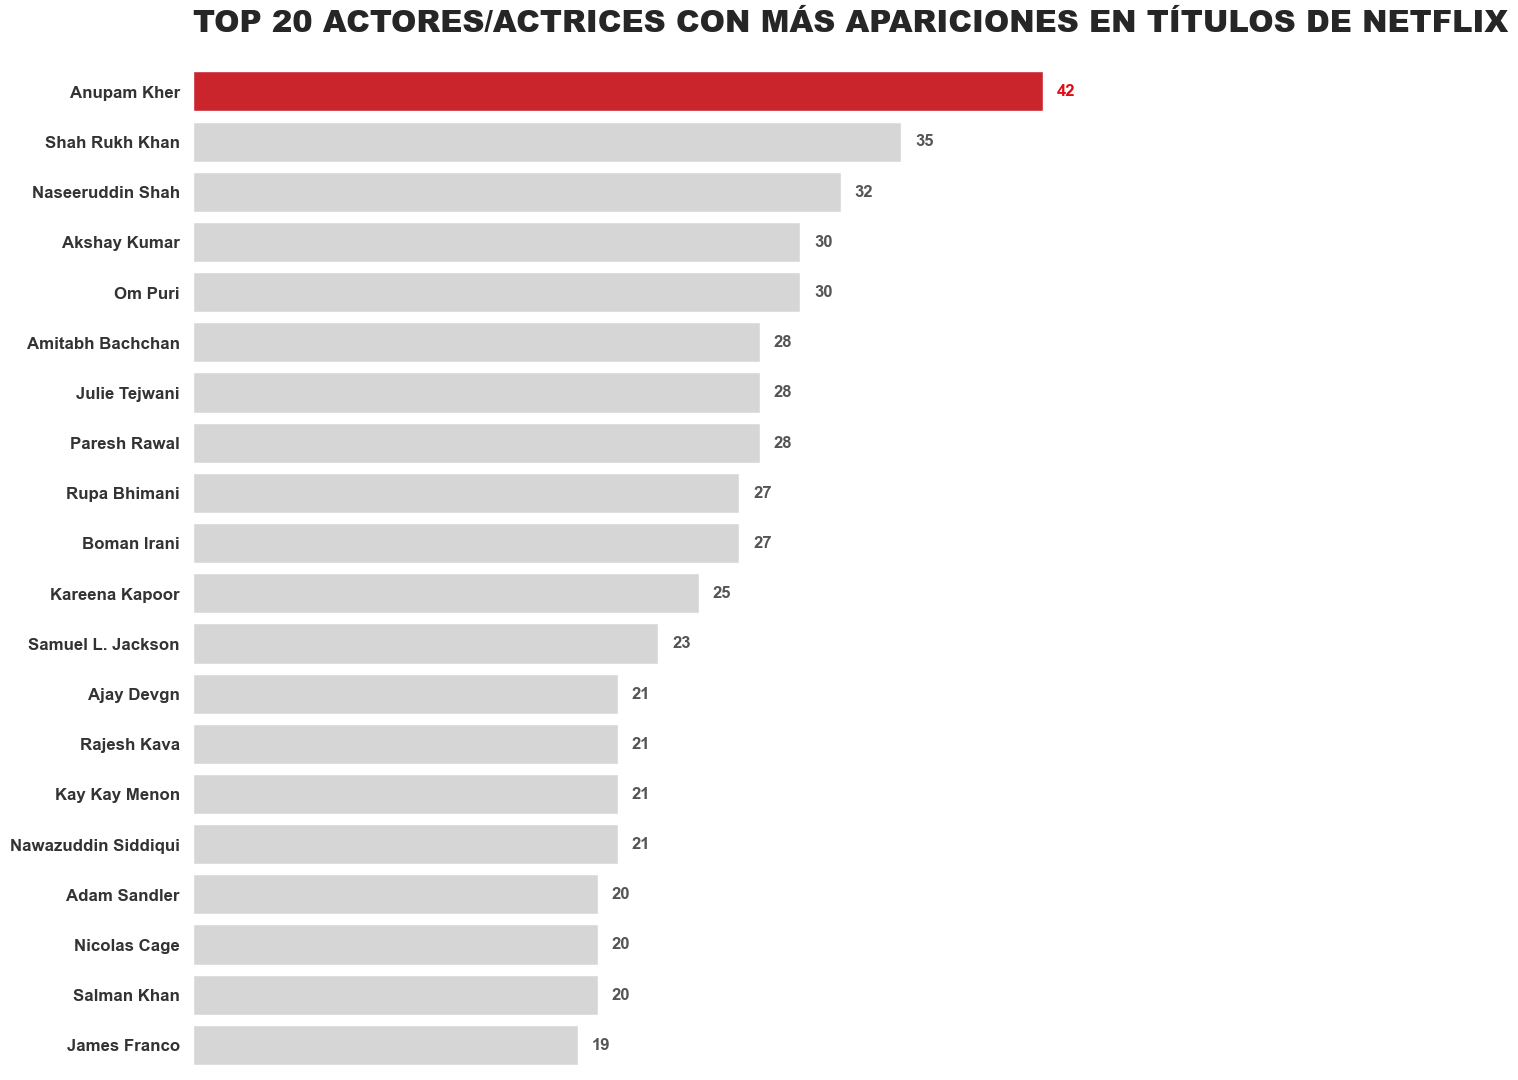

In [444]:
# PREGUNTA 6: ¿Quién es el actor o actriz que aparece en más películas/series de Netflix? ¿Cuáles son los 20 actores/actrices con más títulos en la plataforma?

print('\nPregunta 6: ¿Quién es el actor o actriz que aparece en más filmerias/series de Netflix? ¿Cuáles son los 20 actores/actrices con más títulos en la plataforma?\n')

# FILTRADO

df = df[df['cast'] != 'Sin Información']
conteo_cast = df['cast'].str.split(',').explode().str.strip().value_counts().drop('Sin Información', errors='ignore').head(20)
print(conteo_cast,'\n')

top_cast = conteo_cast.head(20)

# GRÁFICO

sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(12, 11)) 

colores_cast = ['#E50914'] + ['#D6D6D6'] * (len(conteo_cast) - 1)

ax = sns.barplot(
    y=conteo_cast.index, 
    x=conteo_cast.values,
    palette=colores_cast,
    hue=conteo_cast.index,
    legend=False
)

for i, valor in enumerate(conteo_cast.values):
    color_texto = '#E50914' if i == 0 else '#555555'
    
    ax.annotate(
        f"{valor:,}",           
        xy=(valor, i),          
        xytext=(10, 0),         
        textcoords="offset points", 
        ha='left', 
        va='center', 
        fontsize=12,            
        fontweight='bold',
        color=color_texto
    )

sns.despine(
    left=True, 
    bottom=True
)

plt.title(
    "TOP 20 ACTORES/ACTRICES CON MÁS APARICIONES EN TÍTULOS DE NETFLIX",
    fontsize=22,
    fontweight='heavy',
    loc='left',
    pad=25
)

plt.xlabel("") 
plt.ylabel("") 
plt.xticks([]) 

plt.xlim(
    0, 
    conteo_cast.values.max() * 1.15
)

for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_color('#333333')

plt.tight_layout()
print('\n')
plt.show()
print('\n')

In [445]:
# PREGUNTA 7: Búsqueda por texto: Filtra y muestra todas las películas que tengan la palabra "Love" en su título.

print('\nPregunta 7: Búsqueda por texto: Filtra y muestra todas las películas que tengan la palabra "Love" en su título.\n')

peliculas_love = df[(df['title'].str.contains('Love', case=False, na=False)) & (df['type'] == 'Movie')]

with pd.option_context('display.max_rows', None):
    print(peliculas_love[['title']])

print('\n')


Pregunta 7: Búsqueda por texto: Filtra y muestra todas las películas que tengan la palabra "Love" en su título.

                                              title
158                         Love Don't Cost a Thing
159                                  Love in a Puff
206                       LSD: Love, Sex Aur Dhokha
227                                     Really Love
246                                     Man in Love
375                                  Resort to Love
402                 The Last Letter From Your Lover
485                                     Lethal Love
506                        This Little Love Of Mine
615                       Why Do Fools Fall in Love
656                                 Love Is a Story
798                                      Love Jones
875                                   Love or Money
922                           The Clovehitch Killer
950                                The Lovely Bones
1090          Story of Kale: When Someone's in Love
12


Pregunta 8: Evolución del contenido: Crea una gráfica de líneas que muestre cuántos títulos se han añadido a Netflix por año.

date_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      51
2016     204
2017     740
2018    1124
2019    1322
2020    1248
2021     962
Name: title, dtype: int64 





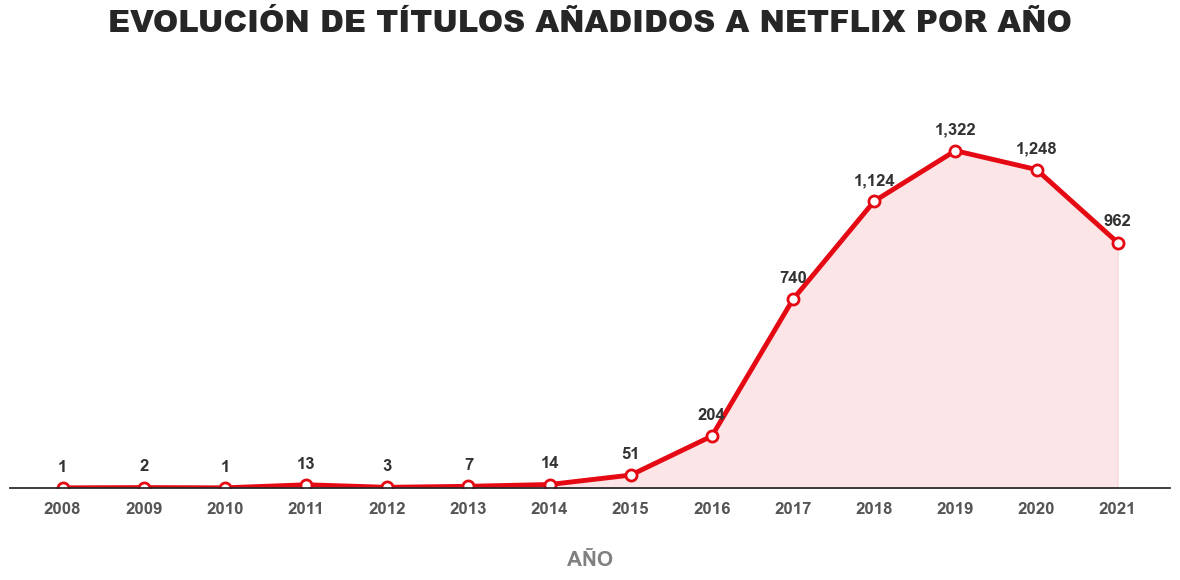

In [446]:
# PREGUNTA 8: Evolución del contenido: Crea una gráfica de líneas que muestre cuántos títulos se han añadido a Netflix por año (usando la columna date_added ya convertida).

print('\nPregunta 8: Evolución del contenido: Crea una gráfica de líneas que muestre cuántos títulos se han añadido a Netflix por año.\n')

# FILTRADO

contenido_anio = df.groupby(df['date_added'].dt.year)['title'].count()
contenido_anio.index = contenido_anio.index.astype(int)
print(contenido_anio,'\n')

# GRÁFICO

sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(12, 6))

plt.plot(
    contenido_anio.index, 
    contenido_anio.values, 
    color='#E50914',          
    linewidth=3.5,            
    marker='o',               
    markersize=8, 
    markerfacecolor='white',  
    markeredgecolor='#E50914',
    markeredgewidth=2
)

plt.fill_between(
    contenido_anio.index, 
    contenido_anio.values, 
    color='#E50914', 
    alpha=0.1
)

for x, y in zip(contenido_anio.index, contenido_anio.values):
    plt.text(
        x, 
        y + (contenido_anio.values.max() * 0.04),
        f"{y:,}",               
        ha='center', 
        va='bottom', 
        fontsize=12,            
        fontweight='bold',
        color='#333333'
    )

sns.despine(left=True)

plt.title(
    "EVOLUCIÓN DE TÍTULOS AÑADIDOS A NETFLIX POR AÑO",
    fontsize=22,
    fontweight='heavy',
    loc='center',
    pad=25
)

plt.xlabel(
    "AÑO", 
    fontsize=15, 
    labelpad=25, 
    fontweight='bold', 
    color='gray'
)

plt.ylabel("") 
plt.yticks([])

plt.xticks(
    contenido_anio.index, 
    color='#555555', 
    fontweight='bold'
)

plt.ylim(
    0, 
    contenido_anio.values.max() * 1.25
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')

In [447]:
# PREGUNTA 9: Antigüedad del contenido: Calcula la diferencia de años entre el año de lanzamiento (release_year) y el año en que se añadió a Netflix. ¿Cuál es el contenido más antiguo añadido a Netflix respecto a su fecha de lanzamiento?

print('\nPregunta 9: Antigüedad del contenido: Calcula la diferencia de años entre el año de lanzamiento (release_year) y el año en que se añadió a Netflix. ¿Cuál es el contenido más antiguo añadido a Netflix respecto a su fecha de lanzamiento?\n')

df['antiguedad'] = df['release_year'] - df['date_added'].dt.year

print(df[df['antiguedad'] == df['antiguedad'].max()],'\n')


Pregunta 9: Antigüedad del contenido: Calcula la diferencia de años entre el año de lanzamiento (release_year) y el año en que se añadió a Netflix. ¿Cuál es el contenido más antiguo añadido a Netflix respecto a su fecha de lanzamiento?

     show_id     type        title     director                                               cast                 country date_added  release_year rating  duration                                          listed_in                                        description  minutes  seasons  antiguedad
7112   s7113  TV Show  Jack Taylor  Stuart Orme  Iain Glen, Killian Scott, Nora-Jane Noone, Tar...  United States, Ireland 2013-03-31          2016  TV-MA  1 Season  Crime TV Shows, International TV Shows, TV Dramas  Ken Bruen's bestselling crime novels leap to l...     <NA>        1         3.0 




Pregunta 10: Meses populares: ¿En qué mes se suele añadir más contenido a la plataforma?

date_added
1     503
2     349
3     495
4     500
5     404
6     457
7     535
8     490
9     474
10    507
11    467
12    511
Name: title, dtype: int64 





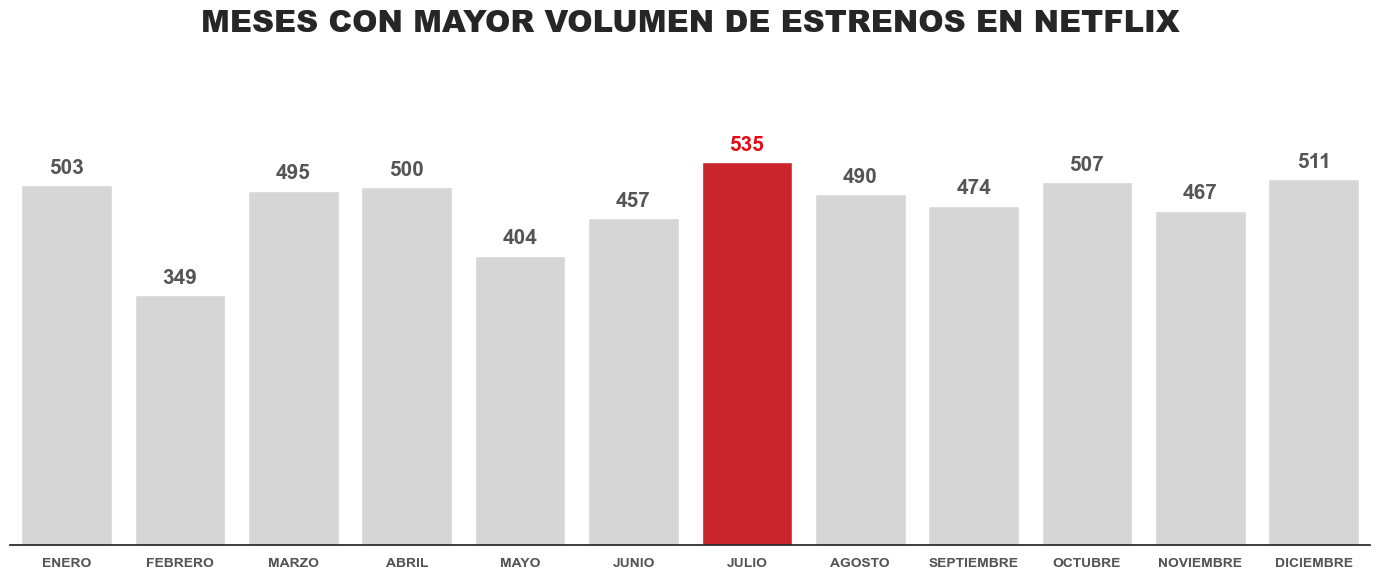

In [448]:
# PREGUNTA 10: Meses populares: ¿En qué mes se suele añadir más contenido a la plataforma?

print('\nPregunta 10: Meses populares: ¿En qué mes se suele añadir más contenido a la plataforma?\n')

# FILTRADO

contenido_mes = df.groupby(df['date_added'].dt.month)['title'].count()
contenido_mes.index = contenido_mes.index.astype(int)
print(contenido_mes,'\n')

meses_espanol = {
    1: 'ENERO', 2: 'FEBRERO', 3: 'MARZO', 4: 'ABRIL',
    5: 'MAYO', 6: 'JUNIO', 7: 'JULIO', 8: 'AGOSTO',
    9: 'SEPTIEMBRE', 10: 'OCTUBRE', 11: 'NOVIEMBRE', 12: 'DICIEMBRE'
}

contenido_mes.index = contenido_mes.index.map(meses_espanol)

# GRÁFICO

sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(14, 6))

valor_maximo = contenido_mes.values.max()
colores_meses = ['#E50914' if val == valor_maximo else '#D6D6D6' for val in contenido_mes.values]

ax = sns.barplot(
    x=contenido_mes.index,
    y=contenido_mes.values,
    palette=colores_meses,
    hue=contenido_mes.index,
    legend=False
)

for i, valor in enumerate(contenido_mes.values):
    color_texto = '#E50914' if valor == valor_maximo else '#555555'
    
    ax.text(
        i, 
        valor + (valor_maximo * 0.02),
        f"{valor:,}", 
        ha='center', 
        va='bottom', 
        fontsize=15,            
        fontweight='bold',
        color=color_texto
    )

sns.despine(left=True)

plt.title(
    "MESES CON MAYOR VOLUMEN DE ESTRENOS EN NETFLIX",
    fontsize=22,
    fontweight='heavy',
    loc='center',
    pad=25
)

plt.xlabel("") 
plt.ylabel("") 
plt.yticks([]) 

for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_color('#555555')
    tick.set_fontsize(10)

plt.ylim(
    0, 
    valor_maximo * 1.25
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')


Pregunta 11: Mapa de calor: Crea un heatmap que muestre la cantidad de contenido añadido según el "Mes" vs el "Tipo" (Película o Serie).



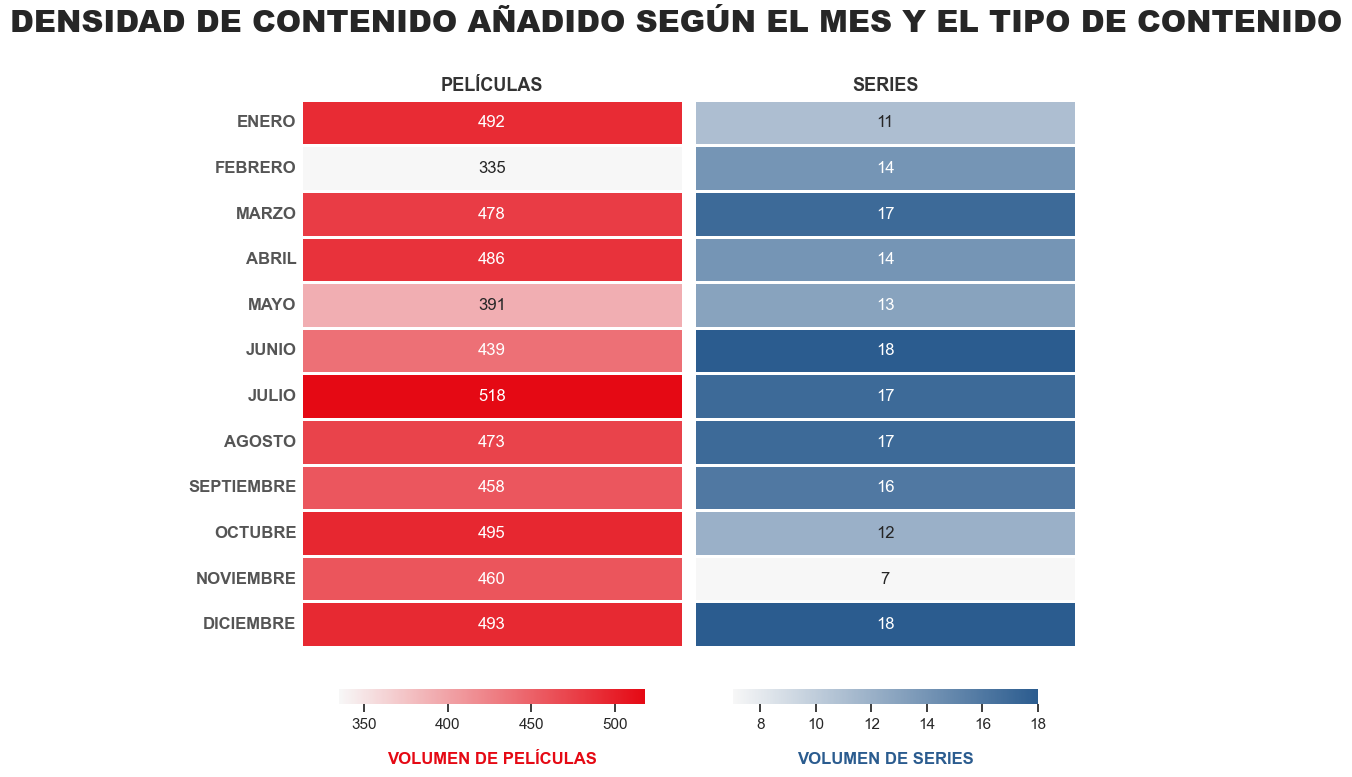

In [449]:
# PREGUNTA 11: Mapa de calor: Crea un heatmap que muestre la cantidad de contenido añadido según el "Mes" vs el "Tipo" (Película o Serie).

print('\nPregunta 11: Mapa de calor: Crea un heatmap que muestre la cantidad de contenido añadido según el "Mes" vs el "Tipo" (Película o Serie).\n')

# FILTRADO

contenido_pelicula_mes = df[df['type'] == 'Movie']['date_added'].dt.month.value_counts().sort_index()
contenido_serie_mes = df[df['type'] == 'TV Show']['date_added'].dt.month.value_counts().sort_index()

df_heatmap = pd.DataFrame({
    'PELÍCULAS': contenido_pelicula_mes,
    'SERIES': contenido_serie_mes,
})

df_heatmap.index = df_heatmap.index.astype(int)
df_heatmap.index = df_heatmap.index.map(meses_espanol)

# GRÁFICO

sns.set_theme(style="white")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 9), gridspec_kw={'wspace': 0.03})

cmap_pelis = LinearSegmentedColormap.from_list("rojo_netflix", ["#f7f7f7", "#E50914"])
cmap_series = LinearSegmentedColormap.from_list("azul_series", ["#f7f7f7", "#2b5c8f"]) 

sns.heatmap(
    df_heatmap[['PELÍCULAS']],
    annot=True, fmt=",d", cmap=cmap_pelis,
    linewidths=2, linecolor='white', ax=ax1,
    cbar_kws={"orientation": "horizontal", "pad": 0.06, "shrink": 0.8}
)

sns.heatmap(
    df_heatmap[['SERIES']],
    annot=True, fmt=",d", cmap=cmap_series,
    linewidths=2, linecolor='white', ax=ax2,
    cbar_kws={"orientation": "horizontal", "pad": 0.06, "label": "VOLUMEN SERIES", "shrink": 0.8}
)

for ax in [ax1, ax2]:
    ax.xaxis.tick_top() 
    ax.tick_params(axis='both', which='both', length=0) 
    ax.set_ylabel("") 
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, fontweight='bold', color='#333333')

ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=12, fontweight='bold', color='#555555', rotation=0)

ax2.set_yticks([]) 

cbar1 = ax1.collections[0].colorbar
cbar1.set_label("VOLUMEN DE PELÍCULAS", labelpad=15, fontweight='bold', color='#E50914')

cbar2 = ax2.collections[0].colorbar
cbar2.set_label("VOLUMEN DE SERIES", labelpad=15, fontweight='bold', color='#2b5c8f')

fig.suptitle(
    "DENSIDAD DE CONTENIDO AÑADIDO SEGÚN EL MES Y EL TIPO DE CONTENIDO",
    fontsize=22, fontweight='heavy', ha='center'
)

plt.show()
print('\n')


Pregunta 12: Distribución de duración: Haz un histograma de la duración de las películas (en minutos).





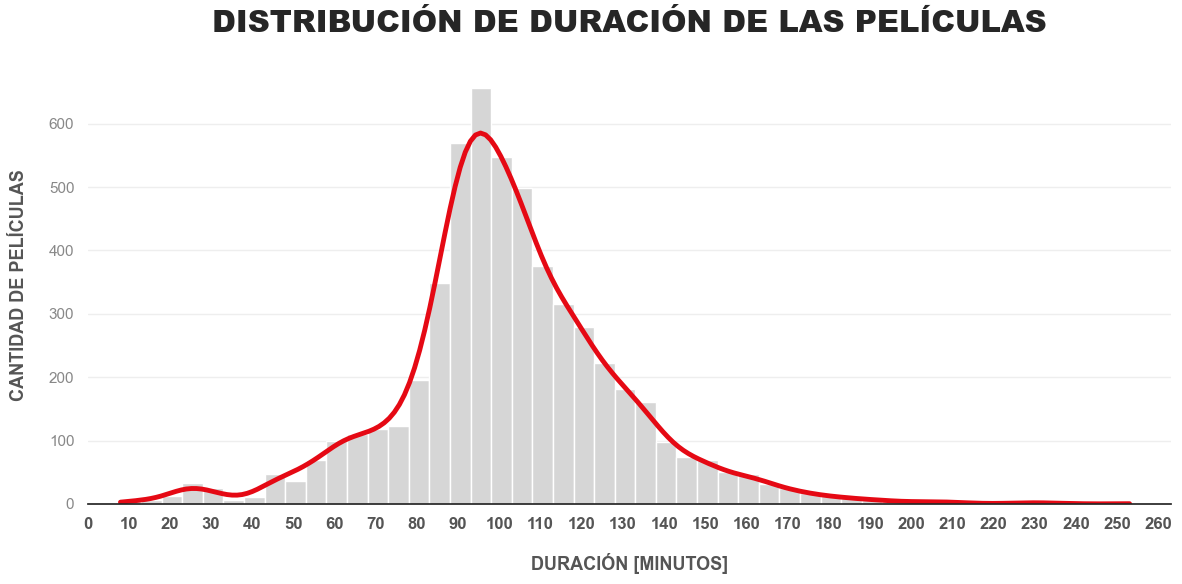

In [450]:
# PREGUNTA 12: Distribución de duración: Haz un histograma de la duración de las películas (en minutos).

print('\nPregunta 12: Distribución de duración: Haz un histograma de la duración de las películas (en minutos).\n')

# FILTRADO

duraciones = df[df['type'] == 'Movie']['minutes']
valor_maximo = duraciones.max()

# GRÁFICO

sns.set_theme(style="white")
plt.figure(figsize=(12, 6))

ax = sns.histplot(
    duraciones,
    binwidth=5,               
    kde=True,                 
    color='#D6D6D6',          
    edgecolor='white',       
    alpha=1
)

ax.lines[0].set_color('#E50914')
ax.lines[0].set_linewidth(3.5)

plt.xticks(
    ticks=range(0, int(valor_maximo) + 10, 10),
    fontsize=12,
    fontweight='bold',
    color='#555555'
)

plt.yticks(fontsize=11, color='#888888')

ax.yaxis.grid(True, color='#eeeeee')
ax.set_axisbelow(True) 
sns.despine(left=True)

plt.title(
    "DISTRIBUCIÓN DE DURACIÓN DE LAS PELÍCULAS",
    fontsize=22,
    fontweight='heavy',
    loc='center',
    pad=25
)

plt.xlabel(
    "DURACIÓN [MINUTOS]", 
    fontsize=13, 
    labelpad=15, 
    fontweight='bold', 
    color='#555555'
)

plt.ylabel(
    "CANTIDAD DE PELÍCULAS", 
    fontsize=13, 
    labelpad=15, 
    fontweight='bold', 
    color='#555555'
)

plt.xlim(
    0, 
    valor_maximo + 10
)

plt.tight_layout()
print('\n')
plt.show()
print('\n')